In [1]:
from google.colab import files
uploaded = files.upload()


Saving student_depression_dataset.csv to student_depression_dataset.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("student_depression_dataset.csv")
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [6]:
print("Dimensiones (filas, columnas):", df.shape)

print("\nColumnas:")
print(df.columns.tolist())

print("\nInfo general:")
df.info()

print("\nEstadísticas descriptivas (numéricas):")
display(df.describe())

print("\nValores faltantes por variable:")
display(df.isnull().sum().sort_values(ascending=False))


Dimensiones (filas, columnas): (27901, 18)

Columnas:
['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']

Info general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure             

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000



Valores faltantes por variable:


,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


Distribución absoluta:


,count
Depression,
1,16336
0,11565



Distribución en proporción:


,proportion
Depression,
1,0.585499
0,0.414501


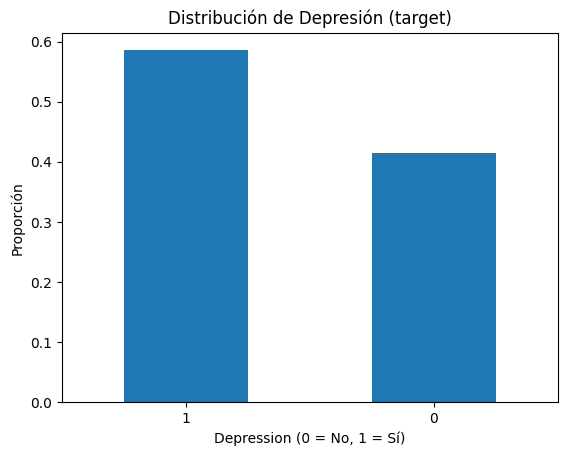

In [7]:
target_col = "Depression"

print("Distribución absoluta:")
display(df[target_col].value_counts())

print("\nDistribución en proporción:")
display(df[target_col].value_counts(normalize=True))

plt.figure()
df[target_col].value_counts(normalize=True).plot(kind="bar")
plt.title("Distribución de Depresión (target)")
plt.xlabel("Depression (0 = No, 1 = Sí)")
plt.ylabel("Proporción")
plt.xticks(rotation=0)
plt.show()


Academic Pressure vs Depression (proporciones por fila):


Depression,0,1
Academic Pressure,,
0.0,0.555556,0.444444
1.0,0.805874,0.194126
2.0,0.625180,0.374820
3.0,0.398419,0.601581
4.0,0.238603,0.761397
5.0,0.139136,0.860864


<Figure size 640x480 with 0 Axes>

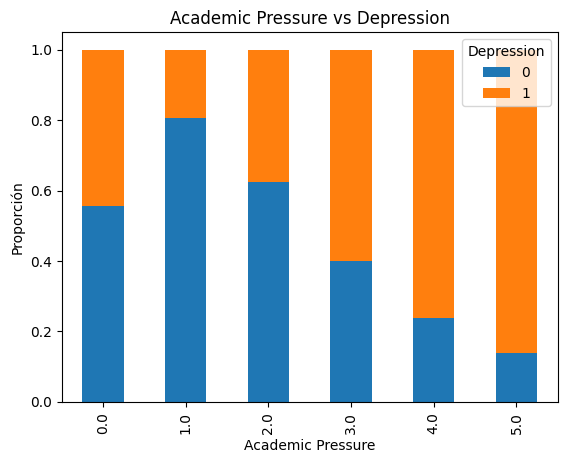

In [9]:
ct_academic = pd.crosstab(df["Academic Pressure"], df[target_col], normalize="index")
print("Academic Pressure vs Depression (proporciones por fila):")
display(ct_academic)

plt.figure()
ct_academic.plot(kind="bar", stacked=True)
plt.title("Academic Pressure vs Depression")
plt.xlabel("Academic Pressure")
plt.ylabel("Proporción")
plt.legend(title="Depression")
plt.show()


Sleep Duration vs Depression (proporciones por fila):


Depression,0,1
Sleep Duration,,
'5-6 hours',0.431182,0.568818
'7-8 hours',0.404982,0.595018
'Less than 5 hours',0.354874,0.645126
'More than 8 hours',0.490735,0.509265
Others,0.500000,0.500000


<Figure size 640x480 with 0 Axes>

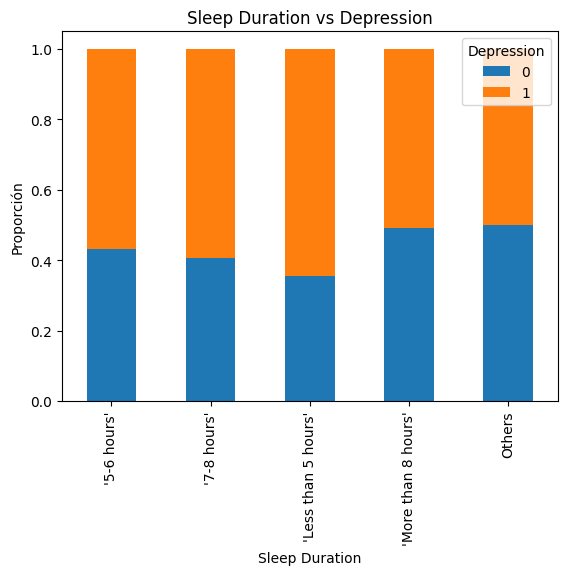

In [10]:
ct_sleep = pd.crosstab(df["Sleep Duration"], df[target_col], normalize="index")
print("Sleep Duration vs Depression (proporciones por fila):")
display(ct_sleep)

plt.figure()
ct_sleep.plot(kind="bar", stacked=True)
plt.title("Sleep Duration vs Depression")
plt.xlabel("Sleep Duration")
plt.ylabel("Proporción")
plt.legend(title="Depression")
plt.show()


Valores únicos Financial Stress (post-limpieza):
[1. 2. 5. 3. 4.]

Financial Stress vs Depression (proporciones por fila):


Depression,0,1
Financial Stress,,
1.0,0.681312,0.318688
2.0,0.570243,0.429757
3.0,0.410639,0.589361
4.0,0.309091,0.690909
5.0,0.187193,0.812807


<Figure size 640x480 with 0 Axes>

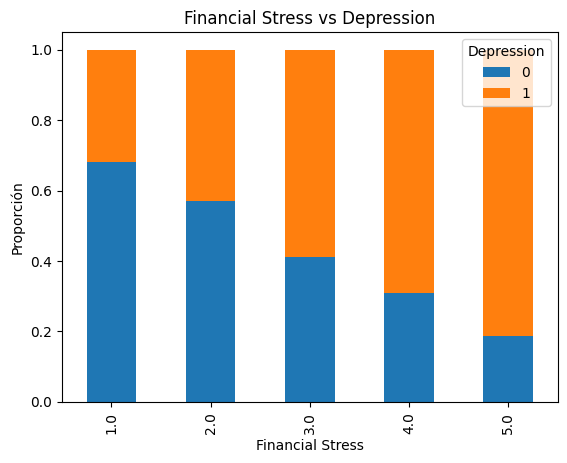

In [11]:
# Copia para limpiar sin dañar el df original
df2 = df.copy()

# Limpiamos Financial Stress (quitamos '?' y convertimos a numérico)
df2["Financial Stress"] = df2["Financial Stress"].replace("?", pd.NA)
df2["Financial Stress"] = pd.to_numeric(df2["Financial Stress"], errors="coerce")

print("Valores únicos Financial Stress (post-limpieza):")
print(df2["Financial Stress"].dropna().unique())

ct_fin = pd.crosstab(df2["Financial Stress"], df2[target_col], normalize="index")
print("\nFinancial Stress vs Depression (proporciones por fila):")
display(ct_fin)

plt.figure()
ct_fin.plot(kind="bar", stacked=True)
plt.title("Financial Stress vs Depression")
plt.xlabel("Financial Stress")
plt.ylabel("Proporción")
plt.legend(title="Depression")
plt.show()


In [12]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols = [c for c in num_cols if c not in ["id", "Depression"]]

corrs = df[num_cols + ["Depression"]].corr(numeric_only=True)["Depression"].sort_values(ascending=False)
print("Correlación (numérica) con Depression:")
display(corrs)


Correlación (numérica) con Depression:


,Depression
Depression,1.000000
Academic Pressure,0.474835
Work/Study Hours,0.208563
CGPA,0.022210
Work Pressure,-0.003351
Job Satisfaction,-0.003482
Study Satisfaction,-0.167971
Age,-0.226422
